In [85]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
% matplotlib inline

% load_ext autoreload
% autoreload 2

In [86]:
import spam_data.nb as nb

In [87]:
def readMatrix(file):
    fd = open(file, 'r')
    hdr = fd.readline()
    rows, cols = [int(s) for s in fd.readline().strip().split()]
    tokens = fd.readline().strip().split()
    matrix = np.zeros((rows, cols))
    Y = []
    for i, line in enumerate(fd):
        nums = [int(x) for x in line.strip().split()]
        # print(nums)
        Y.append(nums[0])
        kv = np.array(nums[1:])
        k = np.cumsum(kv[:-1:2])
        #  print(k)
        v = kv[1::2]
        matrix[i, k] = v
    return matrix, tokens, np.array(Y)

In [88]:
X_train, tokens, y_train = nb.readMatrix('spam_data/MATRIX.TRAIN')

In [89]:
state = nb.nb_train(X_train, y_train)
print(state.keys())

dict_keys(['non_spam_log_prior', 'spam_log_prior', 'phi_log_spam', 'phi_log_non_spam'])


In [90]:
output = nb.nb_test(X_train, state)

In [91]:
train_error = nb.evaluate(output, y_train)

Error: 0.0117


In [92]:
token_array = np.array(tokens)
token_array[np.argsort(np.exp(state['phi_log_spam'])/ np.exp(state['phi_log_non_spam']))[::-1]][:30]

array(['httpaddr', 'spam', 'unsubscrib', 'ebai', 'valet', 'diploma',
       'dvd', 'websit', 'click', 'lowest', 'numberpx', 'arial',
       'helvetica', 'serif', 'nashua', 'amherst', 'mortgag', 'refin',
       'charset', 'newslett', 'customerservic', 'numberpt', 'iso', 'web',
       'lender', 'numberd', 'loan', 'dailybargainmail', 'coral', 'html'],
      dtype='<U16')

In [95]:
token_array[np.argsort(np.exp(state['phi_log_spam']))[::-1][:30]]

array(['number', 'dollar', 'email', 'httpaddr', 'spam', 'free', 'click',
       'numberd', 'mail', 'emailaddr', 'messag', 'com', 'address',
       'servic', 'home', 'inform', 'work', 'special', 'valu', 'order',
       'year', 'site', 'font', 'help', 'onlin', 'product', 'll', 'busi',
       'best', 'price'], dtype='<U16')

上面是top words of spam emials, 这里实际有点神奇，因为phi_spam = 1 - phi_non_spam, 所以选取phi_spam最高的词汇应该差不多，但是与上面的出来的词汇不一样，正确的答案应该选取最上面的，比值越大说明spam的概率更高。

In [96]:
import glob #利用glob.glob获取路径

In [97]:
files_name = sorted(glob.glob('spam_data/MATRIX.TRAIN.[0-9]*'), key = lambda s: int(s.split('.')[-1]))

In [98]:
print(files_name)

['spam_data/MATRIX.TRAIN.50', 'spam_data/MATRIX.TRAIN.100', 'spam_data/MATRIX.TRAIN.200', 'spam_data/MATRIX.TRAIN.400', 'spam_data/MATRIX.TRAIN.800', 'spam_data/MATRIX.TRAIN.1400']


In [99]:
nb_size = []
nb_errs = []
X_test, tokens_test, y_test = nb.readMatrix('spam_data/MATRIX.TEST')
for file in files_name:
    X_data, tok, y = nb.readMatrix(file)
    nb_size.append(X_data.shape[0])
    state_data = nb.nb_train(X_data, y)
    output = nb.nb_test(X_test, state_data)
    nb_errs.append(nb.evaluate(output, y_test))

Error: 0.0387
Error: 0.0262
Error: 0.0262
Error: 0.0187
Error: 0.0175
Error: 0.0163


不同training data的test error

Text(0,0.5,'test error')

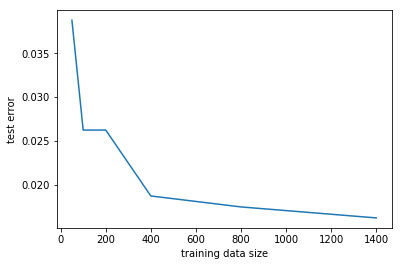

In [100]:
plt.plot(nb_size, nb_errs)
plt.xlabel('training data size')
plt.ylabel('test error')

In [103]:
import spam_data.svm as svm

svm_size = []
svm_errs = []
X_test, tokens_test, y_test = svm.readMatrix('spam_data/MATRIX.TEST')
for file in files_name:
    X, tok, y = svm.readMatrix(file)
    svm_size.append(X.shape[0])
    state = svm.svm_train(X, y)
    output=  svm.svm_test(X_test, state)
    svm_errs.append(svm.evaluate(output, y_test))

Error: 0.0238
Error: 0.0163
Error: 0.0075
Error: 0.0025
Error: 0.0000
Error: 0.0000


Text(0,0.5,'test error')

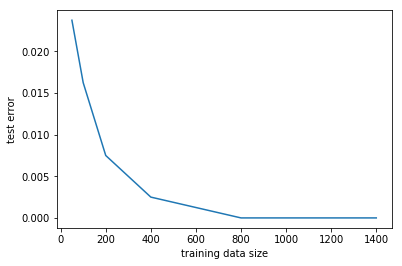

In [104]:
plt.plot(svm_size, svm_errs)
plt.xlabel('training data size')
plt.ylabel('test error')

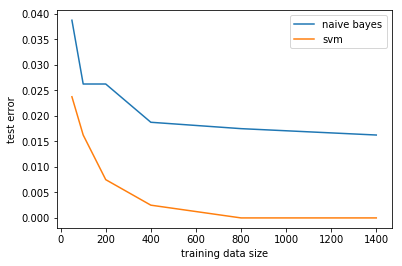

In [105]:
plt.plot(nb_size, nb_errs, label = 'naive bayes')
plt.plot(svm_size, svm_errs, label = 'svm')
plt.xlabel('training data size')
plt.ylabel('test error')
plt.legend()

由上面可以看出svm比NB的表现要好

In [106]:
import numpy as np
a = np.arange(40).reshape(4,2,5)
a[:,1,4] = 0

In [3]:
print(a)

[[[ 0  1  2  3  4]
  [ 5  6  7  8  0]]

 [[10 11 12 13 14]
  [15 16 17 18  0]]

 [[20 21 22 23 24]
  [25 26 27 28  0]]

 [[30 31 32 33 34]
  [35 36 37 38  0]]]


In [4]:
b = 1. * (a > 0)

In [5]:
b

array([[[0., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0.]],

       [[1., 1., 1., 1., 1.],
        [1., 1., 1., 1., 0.]]])

In [7]:
(b * b).shape

(4, 2, 5)

In [9]:
b * b == b

array([[[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]],

       [[ True,  True,  True,  True,  True],
        [ True,  True,  True,  True,  True]]])

In [25]:
c = b.reshape(-1,1)
d = b.reshape(1, -1)
k = (c + d)

In [28]:
e = np.tile(c, (1, 40))

In [29]:
f = np.tile(d, (40,1))

In [31]:
m = e + f

In [32]:
np.where((m == k)==False)

(array([], dtype=int64), array([], dtype=int64))

In [33]:
import tensorflow as tf  

/home/lily/tf3.6/lib/python3.6/importlib/_bootstrap.py:219: RuntimeWarning: compiletime version 3.5 of module 'tensorflow.python.framework.fast_tensor_util' does not match runtime version 3.6
  return f(*args, **kwds)


In [47]:
with tf.Session() as sess:
    a = np.arange(40)
    b = tf.constant(a)
    c = tf.reshape(b, tf.stack([-1,2,5]))
    # print(c.eval())
    c.set_shape([None, None, 5])
    e = tf.reshape(b, [-1,2,5])
    f = tf.expand_dims(b, axis = -1)
    # print(sess.run(f))
    # print(sess.run(e))
    # print(sess.run(c))

In [49]:
a = np.arange(20).reshape(2,2,5)
b = np.arange(10).reshape(2,5)

In [50]:
a + b

array([[[ 0,  2,  4,  6,  8],
        [10, 12, 14, 16, 18]],

       [[10, 12, 14, 16, 18],
        [20, 22, 24, 26, 28]]])

In [58]:
c = np.stack([b,b], axis=  0)

In [59]:
b

array([[0, 1, 2, 3, 4],
       [5, 6, 7, 8, 9]])

In [61]:
d = (c + a)

In [62]:
e = np.arange(5).reshape(-1,1)

In [66]:
f = d.dot(e)

In [68]:
g = f.sum(axis = 1)

In [73]:
np.repeat(g, 2).reshape(2,2,1)

array([[[220],
        [220]],

       [[420],
        [420]]])

In [76]:
f/g

array([[[0.27272727],
        [0.38095238]],

       [[0.72727273],
        [0.61904762]]])

In [81]:
f.shape

(2, 2, 1)

In [80]:
g.shape

(2, 1)

In [83]:
m = np.array([[1,2],[3,4]])
n = np.array([[5,6],[7,8]])
m.dot(n.T)

array([[17, 23],
       [39, 53]])

In [107]:
a = np.arange(10).reshape(2,5,1)
b = np.arange(40).reshape(2,5,4)

In [109]:
c = np.tile(a, [1,1,4])

In [111]:
(c * b).sum(axis = 1)

array([[ 120,  130,  140,  150],
       [1020, 1055, 1090, 1125]])

In [114]:
d = {'col1': [1, 2], 'col2': [3, 4]}
df = pd.DataFrame(data=d)

In [125]:
df1 = df['col1'].reset_index(drop=True)

In [126]:
df1.name += '_st'

In [129]:
df_list = []
df_list.append(df1)

In [131]:
df2 = df['col2'].reset_index(drop=True)
df2.name += '_st'
df_list.append(df2)

In [133]:
pd.DataFrame(df_list).T

,col1_st,col2_st
0,1,3
1,2,4
